In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, re
path = "./Final/"

<IPython.core.display.Javascript object>


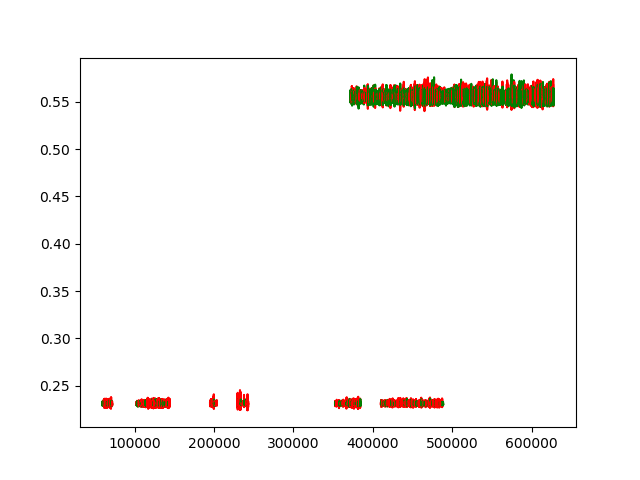

In [5]:
filenames = ['patient16.csv', '1one.csv']
# filenames = ['1one.csv']
signal_all, Y_all, time_all  = [], [], []
normal_count, breath_count, obstr_count = 0, 0, 0

for filename in filenames:
    # dir = "C:\\Users\\Goda\\Desktop\\ITproject\\New annotations\\"
    dir = "Final\\"
#     dir = "C:\\Users\\Goda\\Desktop\\ITproject_git\\"
    path = os.path.join(dir, filename)
    df = pd.read_csv(path, delimiter=',')
    # Patient number
    patient = int(re.findall(r'\d+', filename)[0])
    time = df['Time'].values
    # Getting the signal
    signalAB = df['breath_signal']
    start, end  = df['14 Memory'].values, df['15 Memory'].values
    obstr, normal = df['17 Memory'].values, df['16 Memory'].values

    # Counting the number of objects in each class
    obstr_count += sum(obstr)
    normal_count += sum(normal)
    # Saving the start and end of inspirations
    start_ind = np.where(start == 1)[0]
    end_ind = np.where(end == 1)[0]
    # Normalise the signal
    # minAB = min(signalAB)
    # shift signal so bottom axis is zero
    # signalAB = [i + abs(minAB) for i in signalAB]
    # maxAB = max(signalAB)
    # normalise by dividing by max
    # signalAB = [i/maxAB for i in signalAB]
    signalAB = ((signalAB - signalAB.min())/(signalAB.max()-signalAB.min()))
    signalAB = pd.DataFrame(signalAB)
    signal_pat, time_pat, Y_pat = [], [], []
    e = 0
    for i in range(len(start_ind) - 1):
        if(start_ind[i] > end_ind[e]): e += 1
        if(start_ind[i+1] < end_ind[e]): e -= 1
        if (start_ind[i] != end_ind[e]):
            pre_breath = start_ind[i]
            post_breath = end_ind[e]
            if(len(signalAB[start_ind[i]:start_ind[i+1]]) <= 300
                       and len(signalAB[start_ind[i]:end_ind[e]]) >= 10
                       and len(signalAB[end_ind[e]:start_ind[i+1]]) >= 10):
                if (sum(obstr[pre_breath:post_breath]) >= 1):
                    signal_pat.append(signalAB[start_ind[i]:end_ind[e]])
                    time_pat.append(time[start_ind[i]:end_ind[e]])
                    plt.plot(signalAB[start_ind[i]:start_ind[i+1]], "-r")
                    Y_pat.append(1)
                elif (sum(normal[pre_breath:post_breath]) >= 1):
                    signal_pat.append(signalAB[start_ind[i]:end_ind[e]])
                    time_pat.append(time[start_ind[i]:end_ind[e]])
                    plt.plot(signalAB[start_ind[i]:start_ind[i+1]], "-g")
                    Y_pat.append(0)
                else:
                    plt.plot(signalAB[start_ind[i]:start_ind[i+1]], "-g")
        e += 1
    signal_all.append(signal_pat)
    Y_all.append(Y_pat)
    time_all.append(time_pat)

<IPython.core.display.Javascript object>


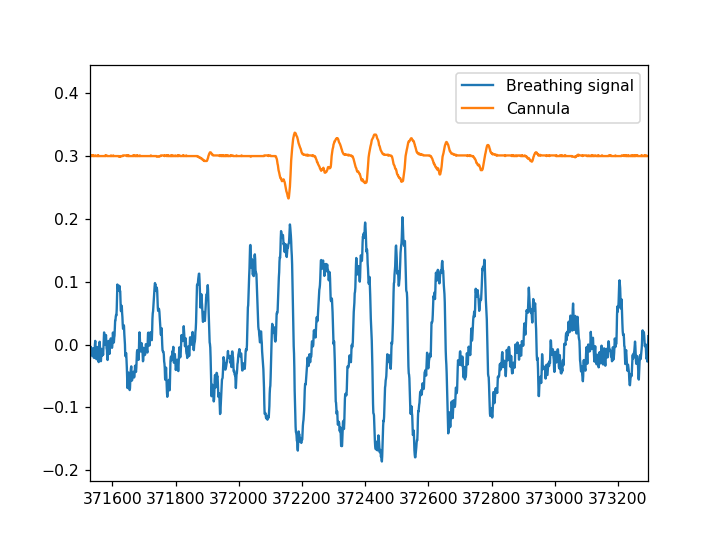

In [12]:
df = pd.read_csv(path + "patient16.csv")
# df = pd.read_csv("./1one.csv"
plt.figure(1)
# plt.plot(df["breath_signal"])
# plt.plot(df["accel_x_g"]-0.5)
# plt.plot(df["accel_y_g"]-0.4)
# plt.plot(df["accel_z_g"]+0.8)
plt.plot(df["breath_signal"])
# plt.xlim([142000, 145000])
plt.plot((df["Cannula"]+29000)/16384 + 0.2)
plt.legend(["Breathing signal", "Cannula"])
# plt.legend(["accel_x", "accel_y", "accel_z"])

plt.plot([np.where(df["14 Memory"]==1)[0][0]]*100, np.linspace(-0.5,0.5,100))
plt.plot([np.where(df["14 Memory"]==1)[0][-1]]*100, np.linspace(-0.5,0.5,100))

<IPython.core.display.Javascript object>


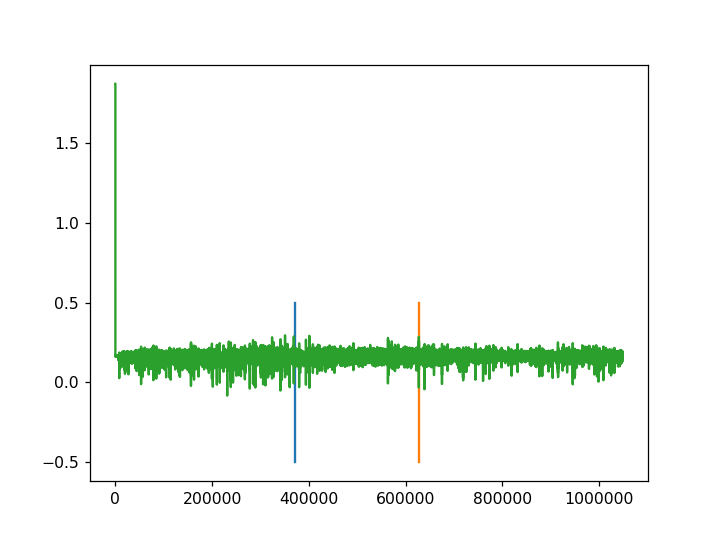

In [2]:
df = pd.read_csv(path + "patient16.csv")
plt.figure(2)
# plt.plot(df["accel_x_g"]-0.7)
# plt.plot(df["accel_y_g"].rolling(5).mean())
# plt.plot(df["accel_z_g"]+0.7)

plt.plot([np.where(df["14 Memory"]==1)[0][0]]*100, np.linspace(-0.5,0.5,100))
plt.plot([np.where(df["14 Memory"]==1)[0][-1]]*100, np.linspace(-0.5,0.5,100))
plt.plot((df["Cannula"]+30000)/16000)

<IPython.core.display.Javascript object>


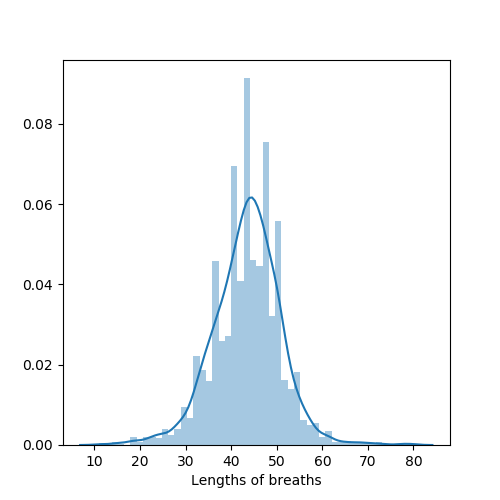

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Lengths of breaths')

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
x = [47, 47, 38, 37, 40, 40, 37, 39, 41, 44, 41, 43, 39, 38, 46, 42, 48, 35, 44, 39, 46, 45, 44, 42, 45, 44, 45, 43, 44, 45, 45, 45, 43, 44, 49, 43, 48, 43, 42, 37, 46, 46, 39, 48, 46, 47, 42, 46, 37, 38, 43, 39, 42, 38, 42, 44, 41, 41, 41, 42, 43, 48, 38, 45, 45, 42, 41, 45, 42, 41, 40, 43, 44, 46, 44, 43, 44, 52, 42, 46, 45, 43, 45, 41, 42, 45, 45, 42, 52, 41, 39, 45, 42, 43, 41, 45, 43, 46, 42, 42, 42, 42, 44, 53, 42, 48, 45, 48, 41, 45, 40, 36, 38, 40, 41, 39, 41, 40, 42, 44, 42, 41, 45, 40, 46, 42, 42, 45, 34, 45, 44, 51, 38, 47, 42, 43, 46, 47, 43, 41, 46, 52, 43, 43, 50, 43, 42, 27, 34, 48, 42, 39, 35, 38, 41, 36, 41, 43, 44, 43, 44, 41, 44, 40, 47, 45, 44, 38, 44, 41, 45, 43, 29, 44, 39, 46, 43, 43, 42, 46, 46, 43, 46, 45, 45, 53, 43, 41, 39, 45, 43, 43, 41, 43, 43, 55, 39, 44, 38, 48, 27, 43, 51, 49, 50, 48, 50, 52, 43, 48, 50, 53, 55, 56, 58, 43, 43, 37, 44, 43, 49, 44, 49, 50, 44, 49, 47, 44, 46, 45, 48, 48, 46, 51, 45, 40, 50, 46, 55, 43, 45, 48, 48, 50, 42, 43, 46, 48, 48, 47, 48, 49, 50, 48, 55, 49, 48, 51, 38, 41, 48, 45, 46, 52, 50, 47, 48, 46, 55, 46, 49, 45, 42, 44, 45, 45, 57, 53, 47, 56, 56, 54, 52, 49, 51, 51, 58, 53, 55, 43, 39, 50, 49, 45, 45, 49, 45, 45, 42, 53, 36, 41, 38, 39, 38, 46, 48, 45, 42, 52, 48, 54, 43, 40, 44, 51, 49, 50, 54, 60, 53, 53, 46, 50, 61, 53, 51, 49, 56, 51, 71, 45, 42, 46, 45, 44, 48, 51, 47, 50, 53, 33, 61, 52, 51, 49, 57, 55, 52, 50, 55, 59, 47, 41, 45, 42, 50, 43, 53, 42, 52, 50, 62, 37, 61, 54, 48, 39, 37, 42, 43, 47, 48, 49, 47, 51, 47, 66, 54, 48, 51, 49, 56, 50, 46, 46, 50, 49, 35, 49, 41, 49, 44, 52, 44, 36, 46, 50, 49, 53, 48, 46, 47, 46, 58, 46, 48, 56, 49, 51, 45, 58, 50, 52, 58, 36, 60, 60, 46, 37, 38, 40, 46, 44, 51, 48, 49, 49, 61, 53, 45, 47, 49, 44, 46, 48, 52, 30, 43, 43, 49, 44, 46, 41, 50, 48, 45, 48, 44, 44, 46, 50, 43, 40, 46, 51, 50, 45, 47, 48, 47, 45, 50, 48, 50, 41, 43, 40, 46, 40, 45, 45, 47, 44, 47, 45, 39, 46, 33, 44, 42, 35, 40, 44, 45, 45, 46, 46, 40, 57, 44, 47, 46, 44, 49, 46, 48, 45, 52, 41, 40, 44, 44, 46, 42, 43, 47, 45, 49, 33, 50, 45, 44, 46, 44, 51, 49, 47, 48, 47, 52, 44, 51, 57, 53, 55, 51, 48, 38, 47, 43, 48, 43, 45, 47, 48, 46, 48, 41, 45, 50, 48, 47, 46, 44, 42, 37, 49, 44, 47, 46, 43, 44, 47, 56, 51, 54, 52, 51, 48, 50, 53, 48, 51, 49, 44, 45, 52, 50, 54, 45, 45, 50, 48, 46, 54, 48, 47, 53, 55, 53, 49, 50, 54, 52, 51, 51, 50, 52, 52, 47, 51, 39, 40, 41, 42, 42, 41, 44, 43, 41, 47, 52, 44, 46, 42, 46, 44, 46, 41, 43, 46, 45, 50, 49, 34, 47, 45, 47, 48, 45, 51, 48, 48, 48, 43, 50, 39, 45, 46, 44, 46, 44, 46, 41, 43, 42, 47, 43, 38, 45, 46, 47, 47, 47, 43, 49, 48, 50, 44, 47, 51, 52, 52, 48, 51, 42, 42, 48, 49, 47, 53, 43, 42, 46, 40, 43, 44, 37, 42, 41, 42, 44, 46, 43, 45, 43, 41, 45, 44, 42, 43, 42, 40, 43, 44, 46, 40, 41, 39, 46, 44, 37, 41, 46, 46, 40, 51, 42, 42, 36, 42, 46, 39, 43, 42, 39, 22, 43, 49, 56, 46, 44, 44, 43, 44, 43, 45, 44, 41, 58, 41, 43, 43, 40, 43, 45, 45, 44, 49, 43, 43, 46, 43, 36, 49, 45, 44, 47, 48, 49, 46, 48, 47, 46, 47, 45, 48, 42, 48, 44, 44, 45, 47, 33, 46, 41, 46, 44, 44, 45, 50, 48, 43, 39, 45, 44, 35, 48, 35, 47, 46, 44, 66, 42, 38, 43, 41, 42, 43, 40, 44, 51, 39, 45, 42, 43, 42, 39, 43, 48, 37, 49, 37, 39, 38, 40, 29, 37, 50, 39, 42, 41, 41, 38, 34, 41, 40, 40, 41, 41, 36, 38, 38, 37, 39, 43, 40, 43, 36, 37, 38, 39, 33, 40, 36, 42, 46, 46, 43, 40, 31, 42, 38, 38, 43, 45, 45, 36, 48, 43, 37, 40, 46, 42, 35, 40, 39, 39, 41, 42, 42, 37, 44, 44, 38, 38, 43, 41, 34, 37, 34, 34, 18, 29, 36, 37, 48, 40, 41, 38, 40, 40, 46, 42, 25, 36, 34, 29, 55, 37, 40, 39, 41, 39, 40, 36, 43, 46, 44, 43, 41, 41, 43, 40, 44, 36, 42, 43, 40, 68, 41, 51, 47, 43, 52, 49, 43, 43, 45, 36, 43, 50, 47, 50, 42, 40, 43, 43, 43, 44, 48, 72, 39, 45, 47, 49, 48, 49, 47, 48, 46, 49, 46, 46, 46, 48, 44, 50, 78, 39, 36, 41, 42, 42, 46, 47, 44, 44, 43, 44, 49, 44, 45, 47, 55, 51, 36, 47, 45, 49, 43, 49, 43, 38, 44, 46, 47, 45, 60, 48, 49, 47, 51, 50, 47, 54, 53, 61, 35, 44, 42, 43, 40, 42, 47, 46, 48, 44, 44, 44, 51, 44, 49, 51, 61, 57, 52, 39, 43, 39, 39, 49, 45, 45, 46, 44, 50, 47, 48, 45, 39, 49, 52, 49, 44, 56, 42, 49, 48, 46, 46, 46, 38, 47, 48, 45, 48, 51, 45, 53, 44, 46, 67, 52, 51, 60, 47, 51, 63, 56, 50, 48, 46, 48, 48, 44, 54, 45, 42, 43, 40, 40, 48, 44, 45, 43, 48, 42, 45, 48, 46, 26, 47, 54, 50, 43, 52, 48, 44, 41, 49, 47, 38, 50, 49, 56, 46, 47, 50, 51, 51, 54, 51, 53, 55, 41, 45, 45, 51, 52, 56, 47, 56, 47, 45, 53, 43, 48, 47, 49, 49, 45, 44, 49, 46, 51, 47, 50, 53, 53, 45, 48, 45, 43, 44, 45, 50, 50, 44, 45, 49, 48, 43, 47, 47, 50, 48, 44, 39, 48, 43, 45, 28, 48, 47, 54, 50, 51, 44, 49, 50, 50, 50, 49, 50, 35, 50, 46, 47, 51, 49, 51, 45, 50, 44, 54, 48, 49, 47, 52, 51, 61, 50, 53, 48, 47, 51, 50, 49, 54, 59, 53, 52, 55, 50, 52, 51, 52, 54, 54, 46, 46, 41, 47, 45, 47, 44, 46, 50, 47, 49, 51, 52, 57, 52, 51, 57, 47, 47, 46, 53, 49, 51, 49, 52, 50, 48, 51, 57, 53, 53, 55, 48, 48, 47, 46, 49, 61, 52, 42, 55, 46, 50, 52, 51, 51, 51, 43, 51, 49, 47, 46, 49, 49, 49, 49, 56, 53, 49, 77, 47, 54, 40, 40, 39, 37, 46, 38, 50, 41, 45, 59, 40, 49, 50, 48, 51, 44, 45, 46, 38, 46, 40, 52, 47, 45, 58, 44, 45, 47, 47, 47, 51, 54, 51, 55, 51, 54, 52, 49, 52, 54, 45, 45, 45, 46, 44, 43, 47, 42, 46, 44, 45, 60, 50, 46, 49, 47, 49, 49, 48, 47, 47, 42, 44, 45, 48, 50, 57, 51, 46, 52, 46, 51, 45, 46, 58, 53, 43, 39, 51, 44, 51, 47, 44, 48, 47, 59, 37, 38, 34, 36, 39, 40, 35, 39, 42, 45, 42, 43, 38, 44, 32, 40, 45, 40, 45, 57, 50, 44, 44, 45, 45, 45, 45, 22, 45, 45, 44, 45, 45, 53, 48, 44, 52, 49, 52, 48, 47, 48, 44, 49, 51, 52, 45, 45, 57, 46, 48, 50, 52, 51, 45, 39, 48, 49, 55, 50, 47, 50, 56, 44, 46, 49, 41, 43, 39, 42, 41, 54, 80, 47, 50, 45, 44, 47, 49, 70, 41, 52, 45, 48, 44, 41, 46, 53, 46, 44, 47, 48, 45, 43, 50, 48, 41, 43, 42, 40, 47, 48, 49, 50, 49, 41, 43, 43, 37, 47, 47, 44, 51, 47, 47, 41, 50, 46, 46, 46, 78, 49, 45, 31, 55, 50, 48, 48, 50, 50, 49, 52, 54, 49, 50, 49, 46, 41, 38, 42, 42, 46, 46, 46, 50, 57, 44, 46, 46, 44, 48, 49, 46, 43, 51, 52, 47, 50, 45, 53, 50, 49, 42, 44, 49, 47, 50, 42, 46, 48, 49, 51, 50, 56, 54, 48, 49, 49, 55, 42, 54, 47, 53, 41, 40, 43, 46, 46, 42, 43, 50, 53, 44, 80, 48, 50, 56, 52, 47, 47, 53, 51, 48, 50, 62, 45, 54, 52, 53, 50, 48, 50, 51, 51, 46, 51, 47, 48, 50, 50, 49, 50, 49, 47, 49, 55, 49, 48, 43, 49, 42, 45, 48, 52, 49, 58, 40, 46, 49, 56, 44, 45, 68, 49, 46, 47, 56, 49, 51, 52, 51, 55, 50, 54, 41, 38, 37, 39, 42, 45, 44, 44, 46, 37, 44, 42, 40, 43, 39, 39, 43, 40, 18, 38, 33, 45, 42, 45, 37, 40, 45, 39, 41, 37, 37, 41, 36, 39, 39, 41, 33, 36, 39, 41, 42, 40, 39, 39, 38, 42, 45, 44, 44, 48, 43, 43, 34, 44, 47, 37, 41, 39, 41, 40, 40, 39, 37, 39, 42, 46, 32, 53, 44, 41, 41, 42, 38, 40, 43, 43, 38, 43, 40, 39, 43, 32, 42, 40, 37, 36, 43, 37, 39, 39, 40, 46, 42, 47, 39, 41, 40, 47, 50, 42, 38, 42, 35, 46, 41, 40, 43, 41]
x += [33, 35, 38, 34, 40, 50, 53, 51, 43, 36, 36, 23, 29, 23, 34, 44, 56, 46, 44, 41, 38, 46, 35, 34, 43, 40, 34, 22, 28, 36, 40, 42, 48, 53, 48, 42, 45, 47, 46, 20, 28, 23, 32, 36, 43, 57, 46, 41, 41, 54, 44, 19, 28, 34, 36, 33, 51, 63, 44, 39, 18, 34, 42, 37, 47, 47, 48, 36, 44, 45, 45, 43, 52, 47, 38, 58, 30, 36, 32, 36, 35, 33, 47, 46, 36, 36, 31, 33, 32, 55, 54, 47, 40, 37, 28, 40, 38, 30, 41, 38, 52, 34, 41, 22, 23, 28, 55, 47, 46, 34, 33, 19, 44, 54, 44, 55, 60, 36, 28, 29, 41, 49, 55, 51, 67, 37, 74, 46, 25, 36, 40, 60, 55, 43, 50, 36, 29, 28, 34, 36, 40, 36, 53, 23, 48, 57, 44, 45, 54, 43, 58, 53, 38, 37, 15, 28, 24, 41, 39, 45, 56, 54, 43, 50, 39, 42, 27, 34, 30, 40, 43, 53, 55, 47, 50, 40, 44, 34, 19, 20, 40, 45, 61, 49, 47, 58, 57, 45, 29, 15, 37, 13, 48, 48, 48, 46, 36, 31, 49, 24, 23, 25, 28, 28, 44, 58, 50, 53, 44, 55, 30, 24, 29, 62, 46, 36, 31, 24, 23, 29, 34, 34, 49, 34, 62, 56, 57, 53, 44, 58, 46, 69, 24, 32, 45, 58, 63, 55, 52, 51, 54, 45, 45, 38, 42, 50, 51, 50, 44, 46, 49, 73, 49, 65, 48, 36, 33, 42, 32, 50, 56, 51, 49, 42, 39, 29, 21, 35, 34, 46, 42, 38, 41, 50, 53, 49, 46, 40, 41, 59, 44, 40, 11, 21, 27, 47, 56, 54, 52, 42, 45, 29, 35, 32, 52, 48, 33, 30, 34, 38, 38, 22, 31, 42, 47, 46, 44, 45, 45, 45, 43, 44, 45, 49, 40, 25, 44, 33, 27, 36, 38, 42, 38, 11, 40, 42, 57, 49, 43, 36, 41, 38, 25, 36, 46, 43, 38, 53, 50, 51, 47, 44, 40, 52, 34, 41, 48, 50, 52, 49, 44, 47, 40, 35, 42, 36, 29, 47, 34, 32, 34, 32, 33, 49, 51, 52, 50, 47, 49, 42, 46, 32, 40, 32, 32, 39, 25, 42, 37, 34, 35, 39, 38, 42, 41, 49, 47, 50, 57, 51, 46, 45, 31, 46, 35, 39, 53, 18, 28, 35, 40, 44, 47, 45, 45, 45, 40, 48, 44, 32, 33, 26, 33, 32, 34, 45, 45, 40, 70, 50, 47, 45, 44, 46, 37, 56, 18, 39, 45, 45, 47, 44, 40, 37, 35, 29, 36, 35, 37, 44, 45, 34, 52, 55, 50, 51, 46, 43, 45, 52, 31, 41, 32, 31, 44, 43, 42, 51, 54, 55, 50, 47, 42, 37, 37, 21, 26, 27, 37, 48, 40, 38, 36, 40, 35, 45, 33, 53, 48, 50, 48, 48, 44, 50, 48, 42, 55, 50, 37, 39, 31, 36, 45, 48, 50, 49, 40, 36, 57, 39, 33, 33, 40, 32, 36, 41, 42, 47, 52, 50, 51, 48, 50, 46, 47, 36, 28, 46, 40, 42, 44, 41, 44, 47, 40, 33, 36, 35, 47, 42, 16, 53, 51, 47, 39, 34, 37, 28, 40, 36, 30, 31, 37, 40, 44, 39, 41, 39, 36, 40, 44, 51, 48, 37, 36, 32, 35, 32, 42, 37, 44, 42, 45, 45, 40, 42, 38, 36, 41, 39, 47, 47, 40, 39, 36, 40, 38, 37, 51, 48, 45, 42, 43, 38, 34, 44, 34, 42, 49, 36, 47, 45, 48, 48, 47, 42, 43, 43, 41, 32, 37, 36, 32, 31, 39, 38, 43, 50, 54, 46, 50, 42, 42, 49, 39, 26, 32, 36, 46, 47, 47, 55, 48, 44, 41, 43, 42, 34, 32, 35, 34, 31, 35, 41, 42, 42, 46, 50, 25, 36, 49, 41, 46, 44, 45, 38, 38, 36, 30, 30, 30, 31, 47, 51, 35, 39, 40, 42, 48, 43, 54, 58, 44, 46, 49, 44, 42, 37, 40, 32, 33, 38, 40, 43, 38, 43, 55, 47, 42, 44, 39, 36, 35, 38, 32, 37, 36, 43, 45, 43, 48, 41, 46, 47, 33, 41, 45, 48, 48, 39, 48, 42, 43, 39, 43, 37, 31, 42, 33, 31, 37, 43, 40, 51, 45, 45, 43, 38, 37, 27, 35, 35, 44, 45, 46, 46, 46, 27, 50, 51, 48, 42, 43, 45, 47, 69, 48, 39, 33, 29, 33, 36, 44, 49, 43, 46, 43, 43, 43, 39, 40, 45, 40, 30, 53, 40, 36, 36, 47, 45, 44, 52, 50, 47, 45, 47, 38, 35, 35, 31, 30, 38, 34, 40, 38, 47, 44, 48, 59, 48, 38, 35, 36, 40, 35, 32, 45, 39, 52, 60, 48, 53, 55, 39, 43, 37, 32, 38, 47, 36, 44, 47, 42, 42, 38, 36, 35, 44, 49, 52, 46, 44, 37, 45, 33, 28, 44, 44, 40, 51, 49, 43, 35, 34, 15, 42, 49, 44, 46, 40, 44, 39, 44, 37, 45, 39, 37, 26, 23, 40, 42, 39, 50, 56, 48, 45, 47, 39, 42, 38, 41, 27, 38, 35, 44, 42, 53, 54, 52, 47, 38, 39, 27, 42, 45, 46, 46, 25, 50, 47, 51, 44, 41, 50, 39, 24, 38, 43, 39, 35, 46, 42, 43, 47, 44, 41, 35, 45, 36, 34, 35, 37, 40, 53, 51, 51, 51, 46, 39, 39, 37, 30, 33, 30, 41, 37, 53, 49, 47, 48, 46, 44, 46, 42, 41, 38, 38, 40, 29, 30, 34, 35, 39, 45, 44, 32, 43, 49, 46, 45, 44, 43, 39, 37, 36, 34, 32, 40, 48, 41, 41, 49, 32, 45, 49, 48, 41, 46, 36, 37, 34, 38, 45, 45, 53, 51, 45, 55, 50, 53, 48, 40, 45, 40, 42, 30, 38, 30, 29, 37, 41, 47, 42, 18, 48, 48, 52, 46, 45, 45, 38, 41, 34, 39, 53, 37, 33, 37, 46, 47, 42, 47, 51, 45, 40, 35, 58, 41, 36, 33, 40, 48, 57, 18, 51, 54, 49, 43, 41, 39, 35, 34, 32, 39, 40, 41, 43, 51, 49, 47, 43, 54, 55, 43, 37, 38, 36, 42, 36, 37, 31, 53, 44, 38, 37, 38, 38, 47, 49, 39, 40, 72, 42, 46, 50, 47, 46, 44, 44, 41, 39, 34, 34, 46, 38, 33, 39, 52, 42, 35, 36, 41, 52, 41, 51, 53, 47, 50, 47, 45, 40, 39, 33, 28, 43, 36, 35, 51, 57, 49, 46, 48, 45, 45, 38, 37, 41, 38, 52, 51, 42, 46, 45, 44, 42, 37, 36, 32, 37, 42, 41, 52, 57, 43, 46, 43, 43, 39, 38, 37, 34, 33, 39, 43, 41, 48, 42, 43, 42, 30, 42, 43, 42, 52, 43, 47, 47, 40, 33, 32, 34, 32, 30, 46, 51, 42, 44, 41, 36, 33, 29, 21, 48, 49, 56, 51, 51, 50, 62, 41, 40, 34, 34, 34, 34, 40, 43, 37, 49, 33, 51, 53, 54, 51, 47, 46, 49, 43, 43, 39, 41, 35, 34, 43, 42, 21, 48, 45, 49, 44, 38, 50, 50, 40, 37, 36, 36, 33, 44, 54, 51, 53, 42, 43, 43, 40, 37, 34, 33, 34, 46, 48, 47, 43, 43, 46, 41, 39, 38, 34, 36, 33, 37, 49, 57, 49, 53, 50, 45, 42, 42, 41, 34, 35, 33, 34, 42, 36, 44, 45, 53, 50, 47, 51, 46, 46, 41, 41, 38, 39, 36, 42, 37, 32, 41, 47, 47, 45, 56, 59, 44, 46, 47, 44, 44, 38, 35, 40, 34, 32, 31, 32, 45, 52, 52, 47, 47, 46, 44, 40, 41, 39, 34, 25, 33, 55, 44, 43, 50, 43, 46, 42, 40, 36, 47, 58, 20, 47, 43, 44, 41, 37, 35, 38, 38, 32, 51, 45, 40, 41, 40, 39, 36, 31, 34, 36, 51, 49, 61, 46, 49, 44, 64, 43, 41, 41, 46, 50, 39, 48, 43, 41, 55, 30, 31, 36, 25, 39, 34, 40, 37, 36, 31, 34, 35, 34, 42, 43, 40, 39, 37, 38, 40, 28, 26, 23, 29, 38, 34, 48, 46, 43, 41, 44, 41, 44, 34, 34, 37, 33, 41, 43, 44, 45, 44, 44, 39, 37, 32, 37, 64, 43, 50, 35, 32, 30, 28, 41, 50, 43, 43, 42, 38, 34, 31, 33, 39, 40, 28, 38, 38, 54, 51, 43, 40, 45, 40, 40, 37, 37, 36, 38, 33, 24, 30, 41, 38, 43, 48, 44, 37, 37, 34, 65, 50, 48, 49, 54, 47, 48, 40, 41, 38, 39, 32, 40, 35, 31, 34, 40, 50, 40, 41, 38, 36, 36, 42, 43, 25, 45, 24, 47, 43, 41, 40, 42, 37, 34, 29, 36, 33, 34, 42, 42, 44, 38, 42, 31, 44, 43, 43, 38, 43, 38, 36, 41, 47, 64, 49, 49, 43, 45, 43, 42, 35, 42, 42, 46, 34, 33, 32, 40, 40, 57, 45, 42, 40, 41, 40, 40, 37, 35, 35, 36, 35, 37, 45, 41, 40, 38, 36, 33, 38, 33, 40, 38, 44, 45, 49, 46, 42, 42, 41, 39, 37, 42, 37, 41, 29, 31, 25, 33, 40, 46, 47, 43, 40, 43, 38, 35, 35, 29, 43, 38, 32, 33, 31, 36, 35, 44, 44, 36, 35, 41, 35, 34, 54, 50, 41, 46, 47, 45, 40, 37, 38, 33, 34, 33, 37, 34, 41, 39, 45, 38, 47, 38, 42, 37, 37, 35, 37, 34, 35, 43, 46, 41, 44, 43, 41, 47, 33, 43, 46, 39, 44, 46, 15, 49, 39, 42, 38, 35, 36, 35, 38, 49, 51, 61, 53, 46, 43, 41, 39, 35, 37, 31, 34, 37, 40, 43, 50, 48, 46, 49, 40, 34, 34, 37, 37, 41, 48, 41, 45, 40, 41, 47, 42, 49, 46, 46, 44, 50, 48, 51, 52, 52, 32, 44, 40, 39, 34, 31, 33, 38, 23, 46, 50, 49, 42, 42, 41, 40, 34, 27, 35, 36, 40, 44, 51, 48, 56, 49, 43, 37, 45, 40, 39, 34, 35, 32, 37, 42, 43, 51, 41, 41, 40, 37, 37, 35, 32, 31, 39, 25, 58, 51, 42, 42, 46, 42, 39, 37, 35, 33, 37, 39, 35, 44, 36, 50, 47, 42, 48, 39, 41, 34, 34, 35, 32, 31, 37, 47, 46, 45, 47, 42, 43, 41, 40, 35, 40, 27, 37, 42, 48, 40, 46, 45, 44, 51, 50, 45, 44, 38, 39, 40, 35, 34, 36, 33, 40, 29, 43, 41, 37, 46, 45, 45, 53, 68, 46, 43, 42, 38, 40, 38, 36, 34, 32, 32, 31, 40, 48, 35, 49, 51, 50, 44, 42, 38, 39, 36, 36, 36, 41, 49, 46, 42, 41, 43, 34, 39, 38, 35, 34, 38, 41, 48, 65, 61, 56, 55]
plt.figure(73,figsize=(5, 5))
count1, count2 = 0, 0
sns.distplot(a=x)
#     plt.xlim(0, 2)
# plt.tight_layout()
plt.xlabel("Lengths of breaths")  